# Aviris Methane Mapping
ESE 156 -- Find the methane plume!

In [1]:
## Make sure plots are create inline
%matplotlib inline
## The usual packages (numpy, matplotlib, etc)
from RSE_style import *

import os
import spectral.io.envi as envi
import math

In [2]:
from spectral import *

In [3]:
# Return the header associated with an image file (HDR datasets, all AVIRIS-like)
def find_header(imgfile):
  if os.path.exists(imgfile+'.hdr'):
    return imgfile+'.hdr'
  ind = imgfile.rfind('.raw')
  if ind >= 0:
    return imgfile[0:ind]+'.hdr'
  ind = imgfile.rfind('.img')
  if ind >= 0:
    return imgfile[0:ind]+'.hdr'
  raise IOError('No header found for file {0}'.format(imgfile));

In [4]:
# You can download all files from ftp://fluo.gps.caltech.edu/XYZT_ESE156/Data/AVng/
in_file = '../Week6/ang20150422t162859_rdn_v1f_clip'
in_hdr = find_header(in_file)
img = envi.open(in_hdr, in_file)
wl = np.loadtxt('../Week6/ANGv3_spc_rev_300nm_truncated.wav')
# Color indices for R,G and B
index_r = np.argmin(np.abs(wl[:,1]-0.65))
index_g = np.argmin(np.abs(wl[:,1]-0.473))
index_b = np.argmin(np.abs(wl[:,1]-0.532))
#print index_r,index_g,index_b

In [5]:
figsize(12,10)
subset = img[2000:3000,:,:]

ImageView object:
  Display bands       :  [0, 216.0, 431]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-4.287654230892211e+28, 4.10032956953832e+29]
    G: [0.005643004085868597, 0.5001394748687744]
    B: [0.0002184876793762669, 0.05886339023709297]

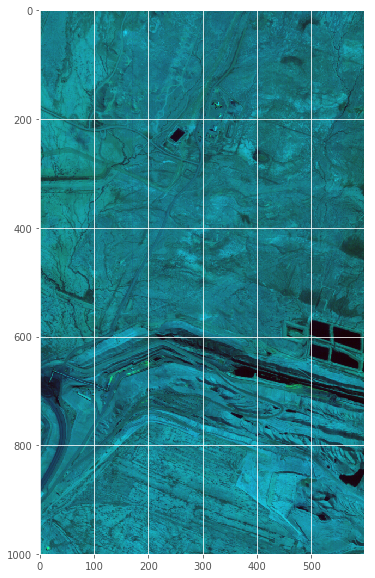

In [6]:
imshow(subset)

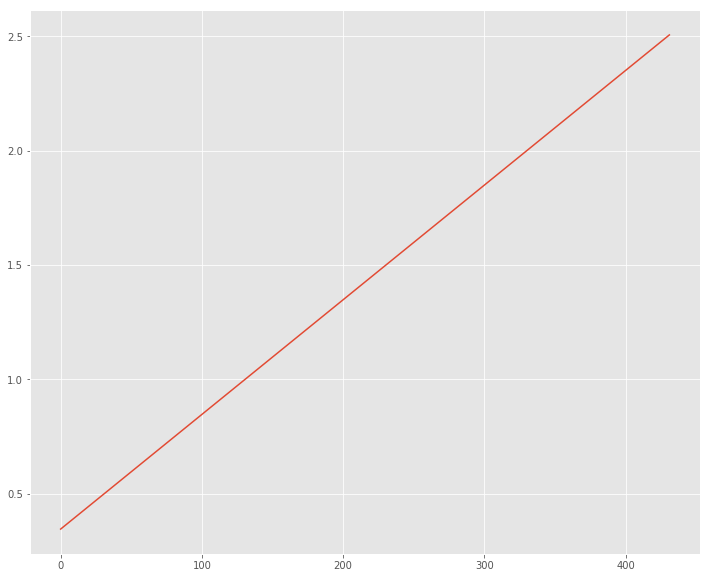

In [7]:
plt.plot(wl[:,1])

(0, 1)

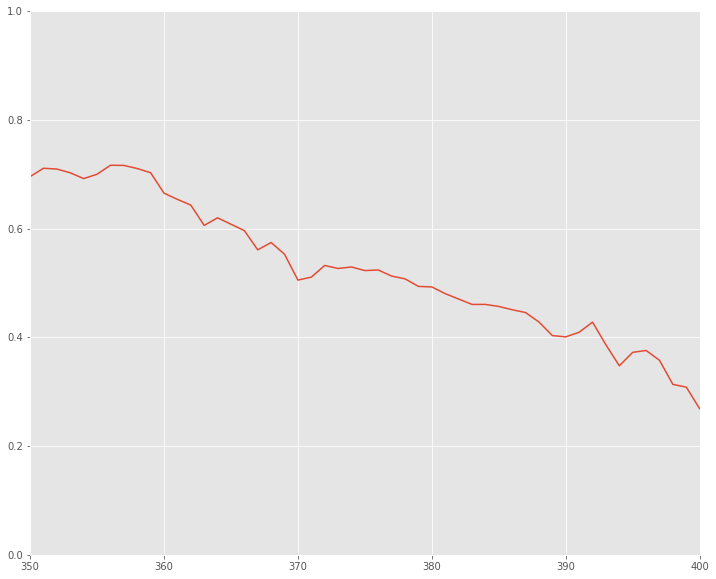

In [8]:
plt.plot(img[1000,200])
plt.xlim(350, 400)
plt.ylim(0,1)

[2.1995075  2.20451617 2.20952484 2.21453351 2.21954218 2.22455085
 2.22955952 2.23456819 2.23957686 2.24458553 2.2495942  2.25460287
 2.25961154 2.26462021 2.26962888 2.27463755 2.27964622 2.28465489
 2.28966356 2.29467223 2.2996809  2.30468957 2.30969824 2.31470691
 2.31971558 2.32472425 2.32973292 2.33474159 2.33975026 2.34475893]
(1000, 598)
[[1.06676028 1.05736402 1.05225904 ... 1.04899905 1.0493565  1.05118107]
 [1.05943859 1.05489411 1.04214893 ... 1.04584147 1.04551778 1.05135307]
 [1.06686208 1.06074693 1.04893071 ... 1.04534748 1.04508174 1.05421137]
 ...
 [1.0694882  1.07115615 1.06717715 ... 1.04711642 1.04989123 1.0587548 ]
 [1.07036852 1.07138417 1.06486659 ... 1.05371583 1.04865184 1.04320626]
 [1.07149989 1.06580262 1.07225384 ... 1.0558278  1.05052878 1.04632781]]


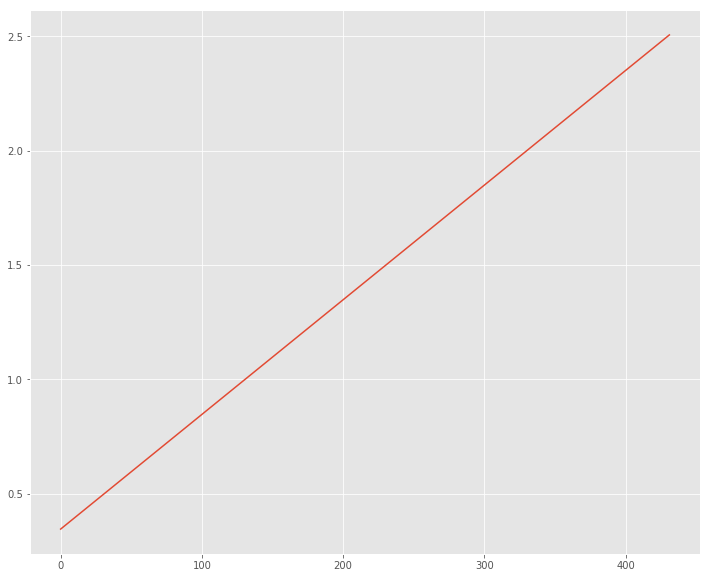

In [12]:
plt.plot(wl[:,1])
print(wl[370:400,1])
methane = np.zeros(subset.shape[0:2])
print(methane.shape)

for i in range(methane.shape[0]):
    for j in range(methane.shape[1]):
        methane[i,j] = math.exp( (subset[i,j,368]+subset[i,j,374])/2 - subset[i,j,370]) 
print(methane)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.996524511778994, 1.1091498559034998]
    G: [0.996524511778994, 1.1091498559034998]
    B: [0.996524511778994, 1.1091498559034998]

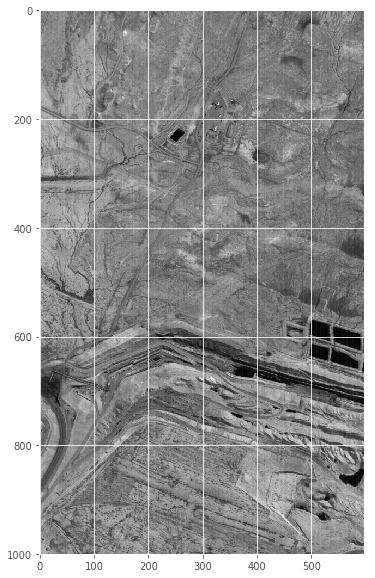

In [13]:
imshow(methane)

ImageView object:
  Display bands       :  [0, 216.0, 431]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-4.287654230892211e+28, 4.10032956953832e+29]
    G: [0.005643004085868597, 0.5001394748687744]
    B: [0.0002184876793762669, 0.05886339023709297]

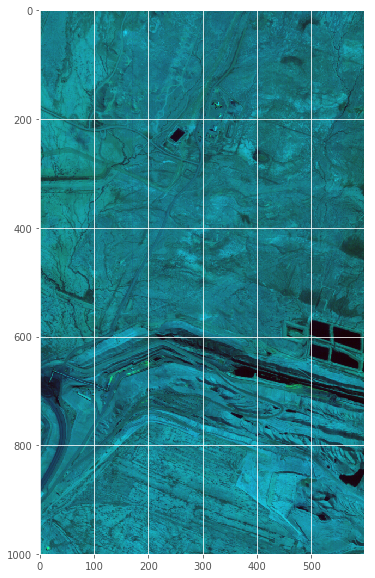

In [11]:
imshow(subset)